In [1]:
%matplotlib inline

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
from sklearn.metrics import mean_squared_error

import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

## Basics of Deep learning and Neural Networks

Let us do an example of a simple NN and the forward propagation.

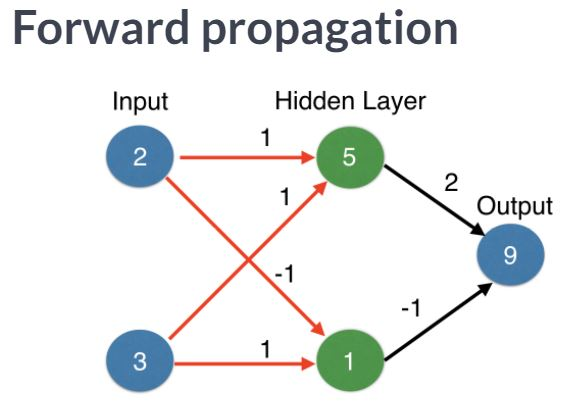

In [3]:
Image(filename = "Capture.JPG", width=500, height=500)

In [4]:
input_data = np.array([2,3])
weights = {
    "node_0": np.array([1,1]),
    "node_1": np.array([-1,1]),
    "output": np.array([2,-1])}

node_0_value = (input_data * weights["node_0"]).sum()
node_1_value = (input_data * weights["node_1"]).sum()

In [5]:
hidden_layer_values = np.array([node_0_value, node_1_value])

In [6]:
output = (hidden_layer_values * weights["output"]).sum()
print(output)

9


Let us now include an activation function to the calculations. An "activation function" is a function applied at each node. It converts the node's input into some output.

In [7]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

9


In [8]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

In [9]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[14, 0, 0, 24]


Now let us do another example with several hidden layers.

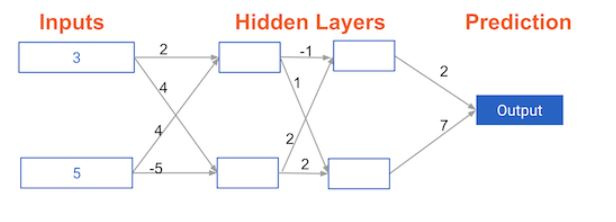

In [10]:
Image(filename = "Capture2.JPG", width=500, height=500)

In [11]:
input_data = np.array([3, 5])
weights = {
    'node_0_0': np.array([2, 4]),
    'node_0_1': np.array([ 4, -5]),
    'node_1_0': np.array([-1,  2]),
    'node_1_1': np.array([1, 2]),
    'output': np.array([2, 7])
}

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)


182


## Backward Propagation

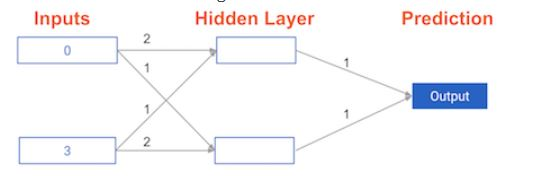

In [12]:
Image(filename = "Capture3.JPG", width=500, height=500)

In [13]:
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 1],
             'output': [0, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


In [14]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

target_actuals = [1, 3, 5, 7]

weigthts_0 = {
    'node_0': np.array([2, 1]), 
    'node_1': np.array([1, 2]), 
    'output': np.array([1, 1])}

weigthts_1 = {
    'node_0': np.array([2, 1]), 
    'node_1': np.array([1. , 1.5]), 
    'output': np.array([1. , 1.5])}

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weigthts_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weigthts_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


Let us now calculate some slopes to ease in into gradient descent territory.

In [15]:
weights = np.array([0, 2, 1])

input_data = np.array([1, 2, 3])

target = 0

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


Having the slopes, we can now improve our weights. But we should be careful not to make big steps.

In [16]:
learning_rate = 0.01

# Update the weights: weights_updated
weights_updated = weights - (slope * learning_rate)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)


7
5.04


Now let us make multiple updates to the weigths.

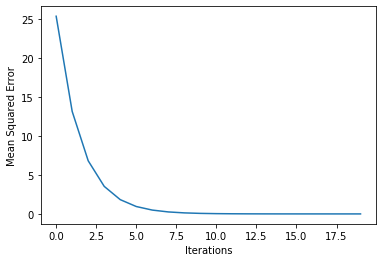

In [17]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

n_updates = 20
mse_hist = []
learning_rate = 0.01

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - slope * learning_rate 
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Using Keras

In [18]:
wages_df = pd.read_csv("hourly_wages.csv")

In [19]:
wages_df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [20]:
wages_df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now let us specify a model in Keras.

In [21]:
predictors = np.array(wages_df.drop("wage_per_hour", axis = 1))

In [22]:
predictors[:1]

array([[ 0,  8, 21, 35,  1,  1,  0,  1,  0]], dtype=int64)

In [23]:
target = np.array(wages_df["wage_per_hour"].values)

In [24]:
target[:1]

array([5.1])

In [25]:
predictors.shape

(534, 9)

In [26]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation = "relu", input_shape = (n_cols, )))

# Add the second layer
model.add(Dense(32, activation = "relu"))

# Add the output layer
model.add(Dense(1))

Now that the model is set, we need to compile it.

In [27]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [28]:
model.fit(predictors, target, epochs = 10)


Epoch 1/10
534/534 [==============================] - 0s 304us/step - loss: 36.5116
Epoch 2/10
534/534 [==============================] - 0s 37us/step - loss: 25.4538
Epoch 3/10
534/534 [==============================] - 0s 41us/step - loss: 22.0850
Epoch 4/10
534/534 [==============================] - 0s 43us/step - loss: 21.5424
Epoch 5/10
534/534 [==============================] - 0s 41us/step - loss: 21.2303
Epoch 6/10
534/534 [==============================] - 0s 56us/step - loss: 20.9538
Epoch 7/10
534/534 [==============================] - 0s 54us/step - loss: 21.0580
Epoch 8/10
534/534 [==============================] - 0s 52us/step - loss: 20.8026
Epoch 9/10
534/534 [==============================] - 0s 45us/step - loss: 20.6559
Epoch 10/10
534/534 [==============================] - 0s 50us/step - loss: 20.5373


Now let us do classficiation! There are several metaparameters that need to be configured differently. The most common loss function used for classification is "categorical_crossentropy", we can also add metrics = \["accuracy"\] for diagnostics, as well as use the "softmax" activation function.

In [29]:
titanic_df = pd.read_csv("titanic_all_numeric.csv")

In [30]:
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [31]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [32]:
predictors = titanic_df.drop("survived", axis = 1)

In [33]:
predictors.shape[1]

10

In [34]:
predictors = titanic_df.drop("survived", axis = 1)

n_cols = predictors.shape[1]

# Convert the target to categorical: target
target = to_categorical(titanic_df["survived"])

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation = "relu", input_shape = (n_cols, )))

# Add the output layer
model.add(Dense(2, activation = "softmax", input_shape = (n_cols, )))

# Compile the model
model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Fit the model
model.fit(predictors, target, epochs = 10)


Epoch 1/10
891/891 [==============================] - 0s 105us/step - loss: 3.6583 - accuracy: 0.5836
Epoch 2/10
891/891 [==============================] - 0s 38us/step - loss: 1.0085 - accuracy: 0.6364
Epoch 3/10
891/891 [==============================] - 0s 38us/step - loss: 0.6668 - accuracy: 0.6599
Epoch 4/10
891/891 [==============================] - 0s 38us/step - loss: 0.6193 - accuracy: 0.6734
Epoch 5/10
891/891 [==============================] - 0s 37us/step - loss: 0.6113 - accuracy: 0.6891
Epoch 6/10
891/891 [==============================] - 0s 35us/step - loss: 0.5972 - accuracy: 0.7026
Epoch 7/10
891/891 [==============================] - 0s 37us/step - loss: 0.5901 - accuracy: 0.7093
Epoch 8/10
891/891 [==============================] - 0s 37us/step - loss: 0.6038 - accuracy: 0.6857
Epoch 9/10
891/891 [==============================] - 0s 45us/step - loss: 0.5892 - accuracy: 0.7037
Epoch 10/10
891/891 [==============================] - 0s 37us/step - loss: 0.5803 - accur

Let us now load our model after it was trained.

In [35]:
model.save("classification_titanic.h5")

In [36]:
my_model = load_model("classification_titanic.h5")

In [37]:
#predictions = my_model(data_to_predict)

In [38]:
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


## Understanding Model optimization

Let us see why choosing a small learning step is important. We will run the same model but with 3 very different learning steps.

In [39]:
def get_new_model(input_shape=(10,)):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr = lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

Epoch 1/1
891/891 [==============================] - 0s 134us/step - loss: 2.7759


Testing model with learning rate: 0.010000

Epoch 1/1
891/891 [==============================] - 0s 154us/step - loss: 1.4760


Testing model with learning rate: 1.000000

Epoch 1/1
891/891 [==============================] - 0s 153us/step - loss: 2627.2808


As we see the loss with the highest step is incomparable to the previous two. Picking up a small learning step is hence a good idea.

We can also implement a stop of the model iterations when after a certain steps we do not have an improvement in the loss function. This is called "early stopping".

In [40]:
early_stopping_monitor = EarlyStopping(patience = 5)
model.fit(predictors, target, validation_split = 0.3, epochs = 20, callbacks = [early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/20
623/623 [==============================] - 0s 191us/step - loss: 0.6777 - val_loss: 0.6536
Epoch 2/20
623/623 [==============================] - 0s 51us/step - loss: 0.6808 - val_loss: 0.6634
Epoch 3/20
623/623 [==============================] - 0s 59us/step - loss: 0.6805 - val_loss: 0.6530
Epoch 4/20
623/623 [==============================] - 0s 56us/step - loss: 0.6777 - val_loss: 0.6699
Epoch 5/20
623/623 [==============================] - 0s 54us/step - loss: 0.6798 - val_loss: 0.7137
Epoch 6/20
623/623 [==============================] - 0s 53us/step - loss: 0.6801 - val_loss: 0.6612
Epoch 7/20
623/623 [==============================] - 0s 56us/step - loss: 0.6806 - val_loss: 0.6619
Epoch 8/20
623/623 [==============================] - 0s 51us/step - loss: 0.6763 - val_loss: 0.6528
Epoch 9/20
623/623 [==============================] - 0s 56us/step - loss: 0.6736 - val_loss: 0.6700
Epoch 10/20
623/623 [=======================

In the example above, we stopped earlier than the specified epochs. Let us compare two examples - one without early stopping and one with early stopping.

In [41]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Fit the model
hist = model.fit(predictors, target, validation_split = 0.3, epochs = 10)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s 345us/step - loss: 1.2277 - accuracy: 0.6003 - val_loss: 0.6681 - val_accuracy: 0.6455
Epoch 2/10
623/623 [==============================] - 0s 63us/step - loss: 0.6504 - accuracy: 0.6565 - val_loss: 0.5321 - val_accuracy: 0.7575
Epoch 3/10
623/623 [==============================] - 0s 65us/step - loss: 0.6088 - accuracy: 0.6838 - val_loss: 0.4890 - val_accuracy: 0.7575
Epoch 4/10
623/623 [==============================] - 0s 75us/step - loss: 0.6302 - accuracy: 0.6645 - val_loss: 0.5741 - val_accuracy: 0.7425
Epoch 5/10
623/623 [==============================] - 0s 66us/step - loss: 0.6939 - accuracy: 0.6613 - val_loss: 0.4775 - val_accuracy: 0.7687
Epoch 6/10
623/623 [==============================] - 0s 69us/step - loss: 0.6639 - accuracy: 0.6790 - val_loss: 0.4927 - val_accuracy: 0.7649
Epoch 7/10
623/623 [==============================] - 0s 72us/step - loss: 0.7492 - accuracy: 0

In [42]:
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 2)

# Fit the model
model.fit(predictors, target, epochs = 30, validation_split = 0.3, callbacks = [early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 439us/step - loss: 0.9197 - accuracy: 0.6019 - val_loss: 0.6142 - val_accuracy: 0.7276
Epoch 2/30
623/623 [==============================] - 0s 77us/step - loss: 0.8031 - accuracy: 0.6180 - val_loss: 0.5504 - val_accuracy: 0.7164
Epoch 3/30
623/623 [==============================] - 0s 72us/step - loss: 0.6455 - accuracy: 0.6565 - val_loss: 0.5395 - val_accuracy: 0.7239
Epoch 4/30
623/623 [==============================] - 0s 74us/step - loss: 0.6880 - accuracy: 0.6501 - val_loss: 0.6086 - val_accuracy: 0.7201
Epoch 5/30
623/623 [==============================] - 0s 69us/step - loss: 0.6269 - accuracy: 0.7095 - val_loss: 0.5043 - val_accuracy: 0.7500
Epoch 6/30
623/623 [==============================] - 0s 66us/step - loss: 0.5999 - accuracy: 0.7063 - val_loss: 0.4980 - val_accuracy: 0.7649
Epoch 7/30
623/623 [==============================] - 0s 66us/step - loss: 0.5958 - accuracy: 0

As we see, we can save lots of time by using early stopping to validate our model. Let us also see this graphically.

No handles with labels found to put in legend.


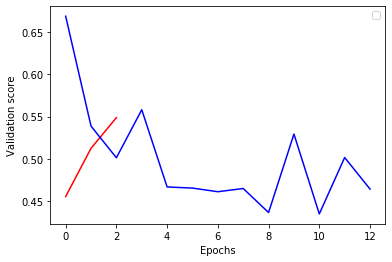

In [43]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation="relu", input_shape=input_shape))
model_2.add(Dense(100, activation="relu"))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Fit model_1
model_training = model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()
plt.show()


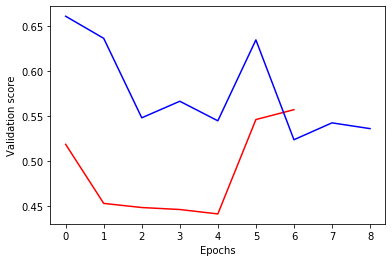

In [44]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_3 = Sequential()

# Add the first, second, and third hidden layers
model_3.add(Dense(50, activation="relu", input_shape=input_shape))
model_3.add(Dense(50, activation="relu"))
model_3.add(Dense(50, activation="relu"))

# Add the output layer
model_3.add(Dense(2, activation='softmax'))

# Compile model_2
model_3.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Fit model 1
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_3_training = model_3.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_2_training.history['val_loss'], 'r', model_3_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


NNs can also be used for classfying images. Let us see one such example.

In [45]:
numbers_df = pd.read_csv("mnist.csv")

In [46]:
numbers_df.iloc[:, :1]

,5
0,4
1,3
2,0
3,2
4,8
...,...
1995,2
1996,2
1997,8
1998,9


In [47]:
numbers_df.iloc[:, 1:]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X = numbers_df.iloc[:, 1:]
y = numbers_df.iloc[:, :1]
y = pd.get_dummies(y)
print(y)

      5
0     4
1     3
2     0
3     2
4     8
...  ..
1995  2
1996  2
1997  8
1998  9
1999  9

[2000 rows x 1 columns]


In [49]:
X.shape

(2000, 784)

In [50]:
y = numbers_df.iloc[:, :1]

In [51]:
y = y.astype(str)

In [52]:
y = pd.get_dummies(y)

In [53]:
y.columns = ["0","1","2","3","4","5","6","7","8","9"]

In [54]:
y.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0


In [55]:
y.shape

(2000, 10)

In [56]:
# # Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation = "relu", input_shape = (X.shape[1],)))

# Add the second hidden layer
model.add(Dense(50, activation = "relu"))

# Add the output layer
model.add(Dense(10, activation = "softmax"))

# Compile the model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split = 0.3, epochs = 5)

Train on 1400 samples, validate on 600 samples
Epoch 1/5
1400/1400 [==============================] - 0s 248us/step - loss: 21.9029 - accuracy: 0.3786 - val_loss: 8.4741 - val_accuracy: 0.5317
Epoch 2/5
1400/1400 [==============================] - 0s 89us/step - loss: 4.5148 - accuracy: 0.6429 - val_loss: 6.1306 - val_accuracy: 0.5800
Epoch 3/5
1400/1400 [==============================] - 0s 128us/step - loss: 2.2748 - accuracy: 0.7386 - val_loss: 4.4923 - val_accuracy: 0.6500
Epoch 4/5
1400/1400 [==============================] - 0s 141us/step - loss: 1.2698 - accuracy: 0.8200 - val_loss: 3.9038 - val_accuracy: 0.6700
Epoch 5/5
1400/1400 [==============================] - 0s 142us/step - loss: 0.8338 - accuracy: 0.8607 - val_loss: 3.5933 - val_accuracy: 0.6983
